In [25]:
from disentangle.configs.pavia_atn_config import get_config
from disentangle.data_loader.vanilla_dloader import MultiChDloader, GridAlignement
from disentangle.core.data_split_type import DataSplitType
import matplotlib.pyplot as plt

config = get_config()
config.data.image_size = 512
dset = MultiChDloader(
    config.data,
       '/group/jug/ashesh/data/microscopy/OptiMEM100x014.tif',
    DataSplitType.Train,
    val_fraction=config.training.val_fraction,
    test_fraction=config.training.test_fraction,
    normalized_input=config.data.normalized_input,
    enable_rotation_aug=config.data.normalized_input,
    enable_random_cropping=config.data.deterministic_grid is False,
    use_one_mu_std=config.data.use_one_mu_std,
    allow_generation=False,
    max_val=None,
    grid_alignment=GridAlignement.LeftTop,
    overlapping_padding_kwargs=None)

mean, std = dset.compute_mean_std()
dset.set_mean_std(mean, std)

inp, target = dset[0]
_,ax = plt.subplots(figsize=(10,5),ncols=2)
inp, target = dset[0]
ax[0].imshow(target[0])
ax[1].imshow(target[1])

Loading /group/jug/ashesh/data/microscopy/OptiMEM100x014.tif with Channels 2,3,datasplit mode:Train

[MultiChDloader] Sz:512 Train:1 N:49 NumPatchPerN:25 NormInp:True SingleNorm:True Rot:True RandCrop:True Q:1 ReplaceWithRandSample:False Uncorr:True BckQ:0.0


Loading /group/jug/ashesh/data/microscopy/OptiMEM100x014.tif with Channels 2,3,datasplit mode:Train

[LCMultiChDloader] Sz:256 Train:1 N:49 NumPatchPerN:100 NormInp:True SingleNorm:True Rot:False RandCrop:True Q:1 ReplaceWithRandSample:False Uncorr:True BckQ:0.0 Pad:{'mode': 'reflect'}
(3, 256, 256) (2, 256, 256)


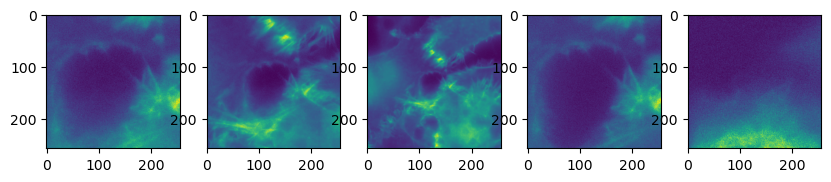

In [31]:
import matplotlib.pyplot as plt
from disentangle.configs.pavia_atn_config import get_config
from disentangle.data_loader.lc_multich_dloader import LCMultiChDloader
config = get_config()
config.data.image_size = 256

padding_kwargs = {'mode': config.data.padding_mode}
if 'padding_value' in config.data and config.data.padding_value is not None:
    padding_kwargs['constant_values'] = config.data.padding_value

dset = LCMultiChDloader(config.data,
                        '/group/jug/ashesh/data/microscopy/OptiMEM100x014.tif',
                        DataSplitType.Train,
                        val_fraction=config.training.val_fraction,
                        test_fraction=config.training.test_fraction,
                        normalized_input=config.data.normalized_input,
                        enable_rotation_aug=config.data.train_aug_rotate,
                        enable_random_cropping=config.data.deterministic_grid is False,
                        use_one_mu_std=config.data.use_one_mu_std,
                        allow_generation=False,
                        num_scales=config.data.multiscale_lowres_count,
                        max_val=None,
                        padding_kwargs=padding_kwargs,
                        grid_alignment=GridAlignement.Center,
                        overlapping_padding_kwargs=None)

mean, std = dset.compute_mean_std()
dset.set_mean_std(mean, std)

inp, tar = dset[0]
print(inp.shape, tar.shape)
_, ax = plt.subplots(figsize=(10, 2), ncols=5)
ax[0].imshow(inp[0])
ax[1].imshow(inp[1])
ax[2].imshow(inp[2])
ax[3].imshow(tar[0])
ax[4].imshow(tar[1])


(3, 256, 256) (2, 256, 256)


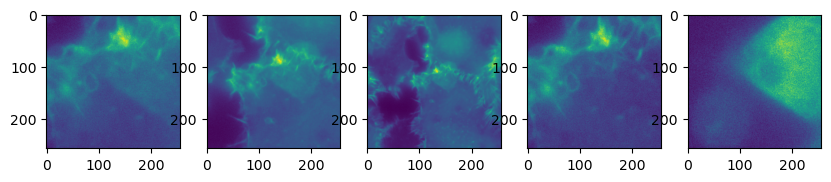

In [34]:
inp, tar = dset[0]
print(inp.shape, tar.shape)
_, ax = plt.subplots(figsize=(10, 2), ncols=5)
ax[0].imshow(inp[0])
ax[1].imshow(inp[1])
ax[2].imshow(inp[2])
ax[3].imshow(tar[0])
ax[4].imshow(tar[1])